In [148]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [149]:
vix_df = pd.read_excel('cboe_vol.xlsx')
vix_df['Date'] = pd.to_datetime(vix_df['Date'], format='%d%b%Y')
vix_df.set_index('Date', inplace=True)
vix_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8317 entries, 1986-01-02 to 2018-12-31
Data columns (total 4 columns):
CBOE S&P500 Volatility Index - Close    7304 non-null float64
CBOE S&P100 Volatility Index - Close    8309 non-null float64
CBOE NASDAQ Volatility Index - Close    4504 non-null float64
CBOE DJIA Volatility Index - Close      5342 non-null float64
dtypes: float64(4)
memory usage: 324.9 KB


In [261]:
factors_df = pd.read_excel('factors.xlsx', parse_dates=['date'], index_col='date')
factors_df.rename(columns={'Excess Return on the Market':'mkt', 'Small-Minus-Big Return':'smb', 'High-Minus-Low Return':'hml', 'Risk-Free Return Rate (One Month Treasury Bill Rate)':'rf', 'Momentum':'mom'}, inplace=True)
factors_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24391 entries, 1926-07-01 to 2018-12-31
Data columns (total 5 columns):
mkt    24391 non-null float64
smb    24391 non-null float64
hml    24391 non-null float64
rf     24391 non-null float64
mom    24290 non-null float64
dtypes: float64(5)
memory usage: 1.1 MB


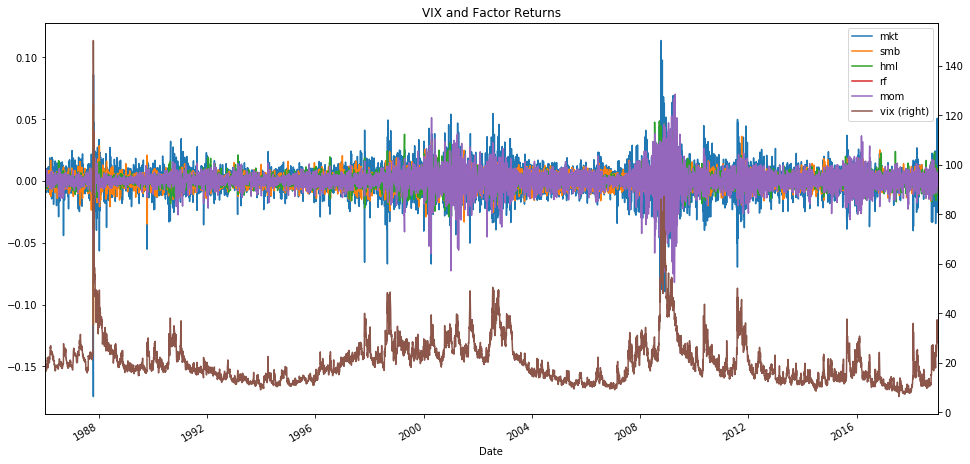

In [270]:
vix_s = vix_df['CBOE S&P100 Volatility Index - Close'].dropna()
factors_df = factors_df.loc[vix_s.index, :]
data = factors_df.copy()
data['vix'] = vix_s

data.plot(title='VIX and Factor Returns', figsize=(16,8), secondary_y=['vix']);

In [271]:
data.describe()

,mkt,smb,hml,rf,mom,vix
count,8309.000000,8309.000000,8309.000000,8309.000000,8309.000000,8309.000000
mean,0.000328,-0.000005,0.000096,0.000125,0.000275,20.041822
std,0.011067,0.005954,0.005726,0.000099,0.008115,8.940371
min,-0.174400,-0.116200,-0.042200,0.000000,-0.082100,6.320000
25%,-0.004200,-0.003300,-0.002500,0.000010,-0.002700,13.800000
50%,0.000700,0.000100,0.000000,0.000130,0.000600,18.160000
75%,0.005400,0.003300,0.002500,0.000200,0.003800,23.720000
max,0.113500,0.062000,0.048300,0.000360,0.070100,150.190000


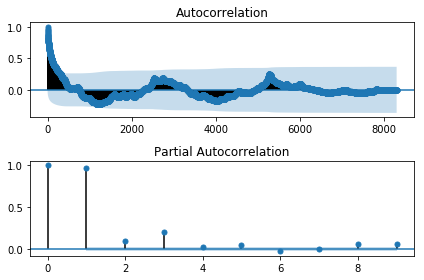

In [253]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

vix_hamilton = vix_s.dropna()

fig, axes = plt.subplots(2,1)

plot_acf(vix_hamilton, ax=axes[0]);
plot_pacf(vix_hamilton, ax=axes[1], lags=np.arange(0, 10));
fig.tight_layout()

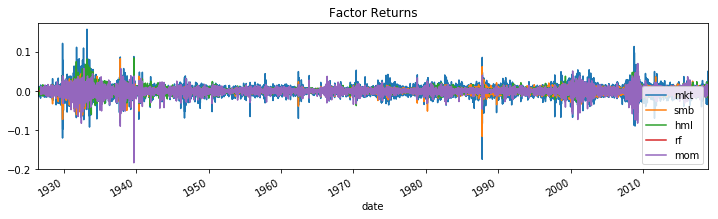

In [260]:
factors_df.plot(title='Factor Returns', figsize=(12,3));

In [254]:
mod_hamilton = sm.tsa.MarkovAutoregression(vix_hamilton, k_regimes=2, order=1, switching_ar=False, switching_variance=False)
res_hamilton = mod_hamilton.fit(method='bfgs', maxiter=100)

/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda/lib/python3.6/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1757: RuntimeWarning: divide by zero encountered in log
  self.llf_obs = np.log(self.joint_likelihoods)
/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/anaconda/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/anaconda/lib/python3.6/site-packages/statsmo

In [255]:
res_hamilton.summary()

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


ValueError: On entry to DLASCL parameter number 5 had an illegal value

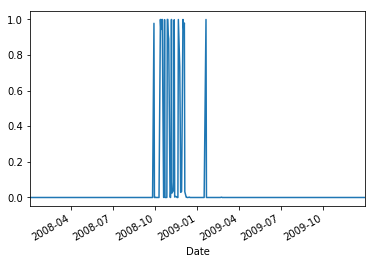

In [241]:
res_hamilton.smoothed_marginal_probabilities[0].plot();

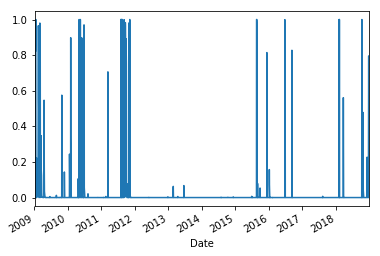

In [215]:
res_hamilton.filtered_marginal_probabilities[0].plot();